### Cargamos nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [3]:
from pylab import rcParams

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [5]:
from collections import Counter

### Análisis Exploratorio de los Datos

In [6]:
df = pd.read_csv('creditcard.csv')

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [10]:
pd.value_counts(df['Class'], sort=True)

0    284315
1       492
Name: Class, dtype: int64

Existen dos clases dentro de nuestro dataframe, 492 casos de fraude (que son los casos minoritarios) y 284315 casos que no presentan fraude, para un total de 284807 usuarios en total.

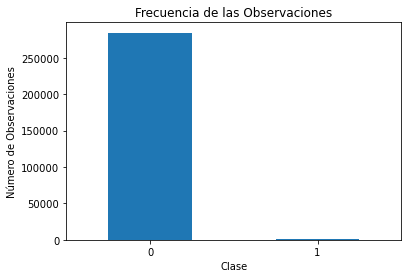

In [25]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
# plt.xticks(range(2))
plt.title('Frecuencia de las Observaciones')
plt.xlabel('Clase')
plt.ylabel('Número de Observaciones')
plt.show()

### Modelo con muestras desbalanceadas

In [26]:
y = df['Class']
X = df.drop('Class', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [52]:
def run_model(X_train, X_test, y_train, y_test):
#     clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", max_iter=len(X_train))
    clf_base = LogisticRegression(max_iter = len(X_train))
    clf_base.fit(X_train, y_train)
    return clf_base

In [53]:
model = run_model(X_train, X_test, y_train, y_test)

In [58]:
def show_results(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,12))
    sns.heatmap(conf_matrix,annot=True, fmt='d')
    plt.title('Matriz de Confusión')
    plt.xlabel('Valor Observado')
    plt.ylabel('Valor Pronosticado')
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [56]:
y_pred = model.predict(X_test)

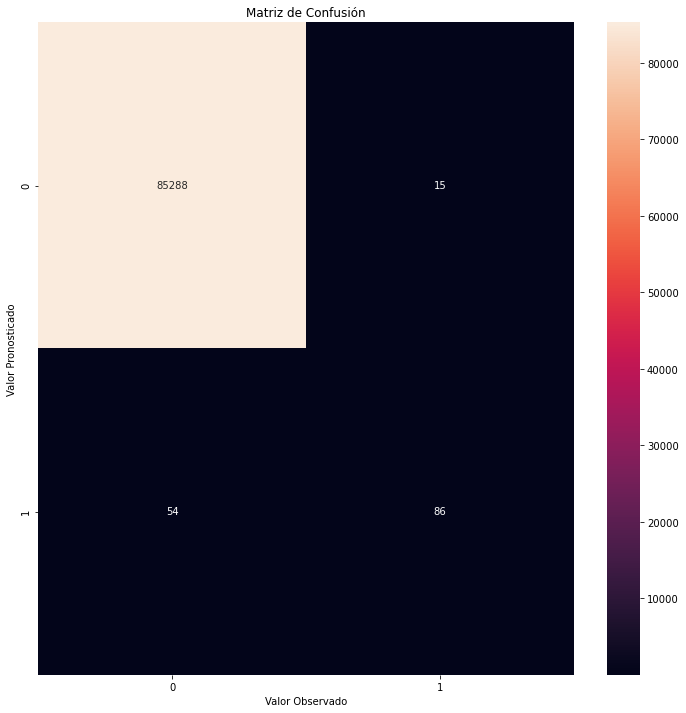

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.85      0.61      0.71       140

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [61]:
show_results(y_test, y_pred)

### Modelo con Penalización

In [62]:
def run_model_balanced(X_train, X_test, y_train, y_test):
#     clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", max_iter=len(X_train))
    clf_base = LogisticRegression(max_iter = len(X_train), class_weight='balanced')
    clf_base.fit(X_train, y_train)
    return clf_base

In [64]:
model = run_model_balanced(X_train, X_test, y_train, y_test)

In [65]:
y_pred = model.predict(X_test)

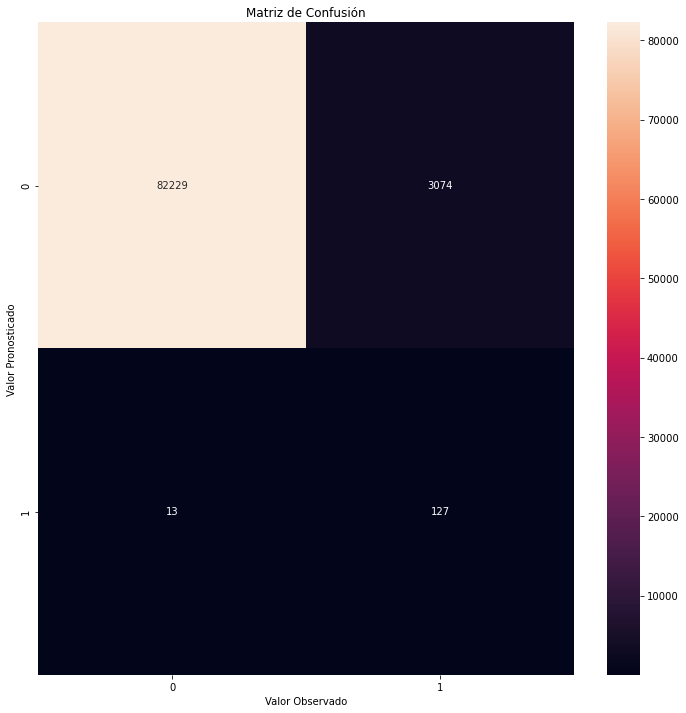

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85303
           1       0.04      0.91      0.08       140

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [66]:
show_results(y_test, y_pred)